In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet50V2, EfficientNetB2, EfficientNetB7, InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [20]:
# === CONFIG ===
BASE_PATH = "datasets"  # ganti sesuai folder lo
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20

train_path = os.path.join(BASE_PATH, "train")
test_path = os.path.join(BASE_PATH, "test")

In [21]:
# === DATA LOADER ===
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


## Single Layer

In [22]:
# === MODEL TRANSFER LEARNING ===
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Freeze pretrained layer dulu

base_model = ResNet50V2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
base_model.trainable = False

base_model = InceptionV3(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)

output_layer = Dense(len(train_generator.class_indices), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Hybrid Layer

In [23]:
# # # --- BUILD DUAL-BACKBONE MODEL (FIXED) ---
# num_classes = len(train_generator.class_indices)
# # 1 single input
# inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# # 2 backbones: instantiate WITHOUT input_shape so they don't create their own Input layers
# mobilenet_backbone = MobileNetV2(include_top=False, weights="imagenet")
# resnet_backbone = ResNet50V2(include_top=False, weights="imagenet")

# # Freeze both initially
# mobilenet_backbone.trainable = False
# resnet_backbone.trainable = False

# # Call both backbones on the SAME input tensor
# m_feat = mobilenet_backbone(inputs)      # feature map from MobileNet
# r_feat = resnet_backbone(inputs)         # feature map from ResNet

# # Pool and combine
# m_pool = GlobalAveragePooling2D()(m_feat)
# r_pool = GlobalAveragePooling2D()(r_feat)

# combined = Concatenate()([m_pool, r_pool])
# combined = Dropout(0.35)(combined)

# outputs = Dense(num_classes, activation="softmax")(combined)

# model = Model(inputs=inputs, outputs=outputs)

# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# #model.summary()

## Tribrid Layer

In [24]:
# # # --- BUILD DUAL-BACKBONE MODEL (FIXED) ---
# num_classes = len(train_generator.class_indices)
# # 1 single input
# inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# # 2 backbones: instantiate WITHOUT input_shape so they don't create their own Input layers
# mobilenet_backbone = MobileNetV2(include_top=False, weights="imagenet")
# resnet_backbone = ResNet50V2(include_top=False, weights="imagenet")
# inception_backbone = InceptionV3(include_top=False, weights="imagenet")

# # Freeze both initially
# mobilenet_backbone.trainable = False
# resnet_backbone.trainable = False
# inception_backbone.trainable = False

# # Call both backbones on the SAME input tensor
# m_feat = mobilenet_backbone(inputs)      # feature map from MobileNet
# r_feat = resnet_backbone(inputs)         # feature map from ResNet
# i_feat = inception_backbone(inputs)

# # Pool and combine
# m_pool = GlobalAveragePooling2D()(m_feat)
# r_pool = GlobalAveragePooling2D()(r_feat)
# i_pool = GlobalAveragePooling2D()(i_feat)

# combined = Concatenate()([m_pool, r_pool, i_pool])
# combined = Dropout(0.35)(combined)

# outputs = Dense(num_classes, activation="softmax")(combined)

# model = Model(inputs=inputs, outputs=outputs)

# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# #model.summary()

## Qubrid Layer

In [25]:
# # # --- BUILD DUAL-BACKBONE MODEL (FIXED) ---
# num_classes = len(train_generator.class_indices)
# # 1 single input
# inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# # 2 backbones: instantiate WITHOUT input_shape so they don't create their own Input layers
# mobilenet_backbone = MobileNetV2(include_top=False, weights="imagenet")
# resnet_backbone = ResNet50V2(include_top=False, weights="imagenet")
# inception_backbone = InceptionV3(include_top=False, weights="imagenet")
# efficient_backbone = EfficientNetB2(include_top=False, weights="imagenet")

# # Freeze both initially
# mobilenet_backbone.trainable = False
# resnet_backbone.trainable = False
# inception_backbone.trainable = False
# efficient_backbone.trainable = False

# # Call both backbones on the SAME input tensor
# m_feat = mobilenet_backbone(inputs)      # feature map from MobileNet
# r_feat = resnet_backbone(inputs)         # feature map from ResNet
# i_feat = inception_backbone(inputs)
# e_feat = efficient_backbone(inputs)

# # Pool and combine
# m_pool = GlobalAveragePooling2D()(m_feat)
# r_pool = GlobalAveragePooling2D()(r_feat)
# i_pool = GlobalAveragePooling2D()(i_feat)
# e_pool = GlobalAveragePooling2D()(e_feat)

# combined = Concatenate()([m_pool, r_pool, i_pool, e_pool])
# combined = Dropout(0.35)(combined)

# outputs = Dense(num_classes, activation="softmax")(combined)

# model = Model(inputs=inputs, outputs=outputs)

# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# model.summary()

In [26]:
# === CALLBACKS ===
checkpoint = ModelCheckpoint("coffee_model.h5", monitor="val_accuracy", save_best_only=True)
earlystop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [27]:
# === TRAIN ===
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    callbacks=[checkpoint, earlystop]
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.5196 - loss: 1.1788

38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 628ms/step - accuracy: 0.6550 - loss: 0.8724 - val_accuracy: 0.8900 - val_loss: 0.3933
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.8143 - loss: 0.4666

38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 264ms/step - accuracy: 0.8400 - loss: 0.4193 - val_accuracy: 0.9150 - val_loss: 0.2861
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.8810 - loss: 0.3336

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - accuracy: 0.8775 - loss: 0.3356 - val_accuracy: 0.9275 - val_loss: 0.2407
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.8990 - loss: 0.2881

38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.8992 - loss: 0.2851 - val_accuracy: 0.9350 - val_loss: 0.2231
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.9015 - loss: 0.2710

38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 291ms/step - accuracy: 0.9167 - loss: 0.2518 - val_accuracy: 0.9375 - val_loss: 0.1828
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9257 - loss: 0.2123

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - accuracy: 0.9308 - loss: 0.2046 - val_accuracy: 0.9425 - val_loss: 0.1916
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.9241 - loss: 0.2145

38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - accuracy: 0.9267 - loss: 0.2033 - val_accuracy: 0.9450 - val_loss: 0.1597
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.9350 - loss: 0.1902 - val_accuracy: 0.9425 - val_loss: 0.1598
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9322 - loss: 0.1894

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.9400 - loss: 0.1799 - val_accuracy: 0.9525 - val_loss: 0.1506
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.9389 - loss: 0.1638

38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.9317 - loss: 0.1812 - val_accuracy: 0.9575 - val_loss: 0.1262
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.9342 - loss: 0.1899 - val_accuracy: 0.9500 - val_loss: 0.1598
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9368 - loss: 0.1854

38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - accuracy: 0.9450 - loss: 0.1635 - val_accuracy: 0.9600 - val_loss: 0.1290
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.9508 - loss: 0.1545 - val_accuracy: 0.9550 - val_loss: 0.1415
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9453 - loss: 0.1568

38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 266ms/step - accuracy: 0.9383 - loss: 0.1556 - val_accuracy: 0.9650 - val_loss: 0.1254
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.9517 - loss: 0.1362 - val_accuracy: 0.9625 - val_loss: 0.1102
Epoch 16/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.9467 - loss: 0.1303 - val_accuracy: 0.9600 - val_loss: 0.1060
Epoch 17/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.9575 - loss: 0.1198 - val_accuracy: 0.9625 - val_loss: 0.1224
Epoch 18/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - accuracy: 0.9517 - loss: 0.1474 - val_accuracy: 0.9625 - val_loss: 0.1210
Epoch 19/20
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9579 - loss: 0.1155

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.9550 - loss: 0.1331 - val_accuracy: 0.9675 - val_loss: 0.1066
Epoch 20/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.9475 - loss: 0.1578 - val_accuracy: 0.9675 - val_loss: 0.1169


In [28]:
# === EVALUATION ===
loss, acc = model.evaluate(test_generator)
print(f"\n🔥 Model Accuracy: {acc * 100:.2f}%")
print(f"📉 Model Loss: {loss:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9600 - loss: 0.1060

🔥 Model Accuracy: 96.00%
📉 Model Loss: 0.1060


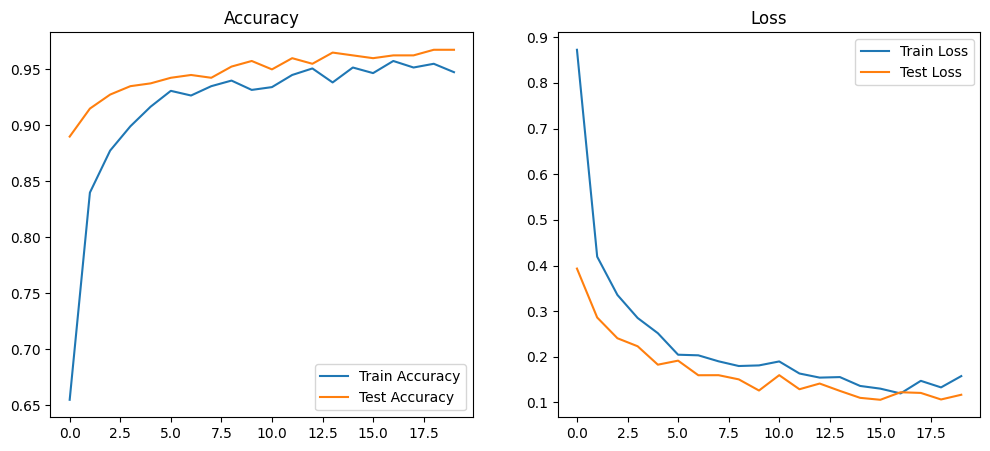

In [29]:
# === VISUALIZE TRAINING ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Test Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Test Loss")
plt.title("Loss")
plt.legend()

plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 439ms/step
              precision    recall  f1-score   support

        Dark       0.98      0.91      0.94       100
       Green       0.97      1.00      0.99       100
       Light       0.96      0.98      0.97       100
      Medium       0.93      0.95      0.94       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



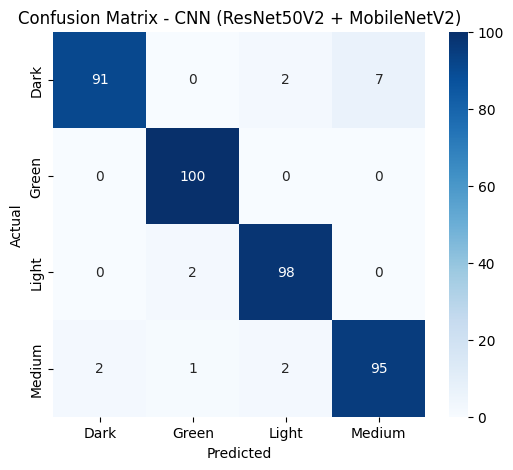

In [30]:
# Ambil label ground truth dari generator
y_true = test_generator.classes  
class_labels = list(test_generator.class_indices.keys())

# Prediksi model (probability → argmax)
y_pred = model.predict(test_generator)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred_class, target_names=class_labels))

# =============================
#  CONFUSION MATRIX
# =============================

cm = confusion_matrix(y_true, y_pred_class)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - CNN (ResNet50V2 + MobileNetV2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()